## Visualisation of BFS graph traversal using networkx library

### INPUT

Input is taken from the file

Sample input: input.txt

4

0  5  10  5

0  0  5  0

0  10  0  0

0  0  10  0

0

First line contains the number of nodes,say n.(Nodes are numbered as 0,1,2,...(n-1) ) Followed by n*n weighted matrix. Disconnected egdes are represented by negative weight. Last line contains the source node.(i.e, the node from which the BFS should begin)

## BFS traversal

Initial edges are marked with black.

When iterative BFS is performed, using a queue. Each time an edge is encountered, it is marked with red on the graph through the line -

nx.draw_networkx_edges(G,pos,edgelist=[(curr_node,i)],width=2.5,alpha=0.6,edge_color='r')

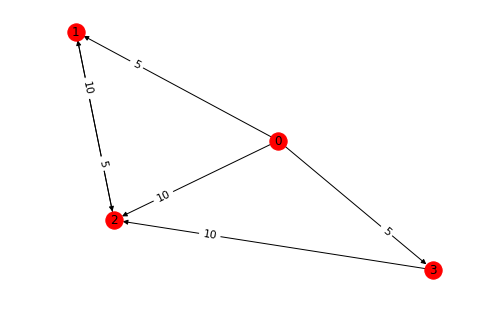

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
 


#BFS traversal 
def BFS(G, source, pos): 
    visited = [False]*(len(G.nodes()))
    queue = []   #a queue for BFS traversal
    queue.append(source)
    visited[source] = True
    while queue:
        curr_node = queue.pop(0)
        for i in G[curr_node]:  #iterates through all the possible vertices adjacent to the curr_node
            if visited[i] == False:
                queue.append(i)
                visited[i] = True
                # nx.draw_networkx_edges(G, pos, edgelist = [(curr_node,i)], width = 2.5, alpha = 0.6, edge_color = 'r')
    return



#takes input from the file and creates a weighted graph
def CreateGraph():
    G = nx.DiGraph()
    f = open('input.txt')
    n = int(f.readline())
    wtMatrix = []
    for i in range(n):
        list1 = list(map(int, (f.readline()).split()))
        wtMatrix.append(list1)
    source = int(f.readline()) #source vertex from where BFS has to start
    #Adds egdes along with their weights to the graph 
    for i in range(n):
        for j in range(n):
            if wtMatrix[i][j] > 0:
                    G.add_edge(i, j, length = wtMatrix[i][j]) 
    return G, source



#draws the graph and displays the weights on the edges
def DrawGraph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels = True)  #with_labels=true is to show the node number in the output graph
    edge_labels = dict([((u,v,), d['length']) for u, v, d in G.edges(data = True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, label_pos = 0.3, font_size = 11) #prints weight on all the edges
    return pos



#main function
if __name__== "__main__":
    G,source = CreateGraph()
    pos = DrawGraph(G)
    BFS(G, source, pos)
    plt.show()

## Complexity

Time: 0(m+n)

where m - number of edges

n - number of nodes